# Task 2
Implement an image compression system using a neural network. The structure of the neural network is the following:
1. an input layer with m x n nodes, where m x n is the image resolution (m rows and n columns of pixels)
2. a compressed layer with P nodes (no activation function), P < m x n
3. an expansion layer with m x n x T nodes, T = 2 is the expansion factor, followed by ReLU activation
4. an output layer with m x n nodes (no activation function)
5. a reshape layer that convert the 1-dimensional vector output to the m x n 2d image

Use the fashion MNIST dataset. Batch size = 64, Epochs = 10.
The loss function (error function) is the mean-squared-error (mse) function.

In [39]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import math
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as aa

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [32]:
m = n = 28
T = 2

In [61]:
def define_model(P):
    # 1. a flattened input layer with m x n nodes
    model = Sequential()
    model.add(Flatten())
    # 2. a compressed layer with P nodes (P < m x n)
    model.add(Dense(P))
    # 3. an expansion layer with m x n x T, T = 2 is the expansion factor, follwed by ReLU
    model.add(Dense(m * n * T, activation = 'relu'))
    # 4. an output layer with m x n nodes
    model.add(Dense(m * n))
    # 5. a reshape layer that convert the 1D vector output to the m x n 2D image
    model.add(Reshape((m, n)))
    
    model.compile(optimizer = 'adam', loss = 'mse')
    model.fit(train_images, train_images, epochs = 10, batch_size = 64)
    decompressed_test_images = model.predict(test_images)
    
    return decompressed_test_images


In [34]:
# Calculate PSNR for a single image
def get_PSNR(image, decompressed_image):
    mse = np.mean((image - decompressed_image) ** 2)
    PSNR = 10 * math.log10(1.0 / mse)
    return PSNR

In [35]:
# Calculate the average reconstruction PSNR  value of the test frames vs. P
def get_average_PSNR(images, decompressed_images):
    psnr = 0.0
    for i, j in zip(images, decompressed_images):
        psnr += get_PSNR(i, j)
    
    return psnr / len(images)

In [60]:
# grayscale
# display a row of original images and a row of corresponding decompressed images
def display_gray_images(images, decompressed_images, P):
    original = np.concatenate((images[0 : 10]), axis = 1)
    decompressed = np.concatenate((decompressed_images[0 : 10]), axis = 1)
    fig = np.concatenate((original, decompressed), axis = 0)
    # enlarge the image
    plt.figure(figsize = (10, 2))
    figplot = plt.imshow(fig, cmap = plt.get_cmap('gray'))
    plt.show()

In [63]:
# color
# display a row of original images and a row of corresponding decompressed images
def display_color_images(images, decompressed_images, P):
    original = np.concatenate((images[0 : 10]), axis = 1)
    decompressed = np.concatenate((decompressed_images[0 : 10]), axis = 1)
    fig = np.concatenate((original, decompressed), axis = 0)
    # enlarge the image
    plt.figure(figsize = (10, 2))
    figplot = plt.imshow(fig)
    plt.show()

Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0225
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0164
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0153
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0148
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0145
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0142
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0140
Epoch 8/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0139
Epoch 9/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0138
Epoch 10/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0136
when P = 10 PSNR = 19.433696860211533


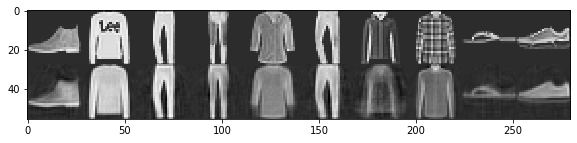

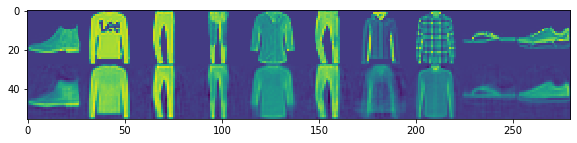

Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0153
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0098
Epoch 3/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0088
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0083
Epoch 5/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0080
Epoch 6/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0078
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0076
Epoch 8/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0074
Epoch 9/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0073
Epoch 10/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0072
when P = 50 PSNR = 22.344102204460025


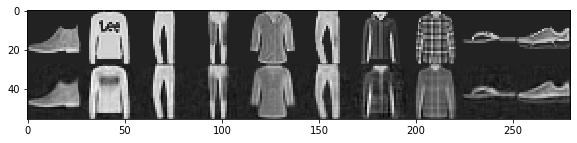

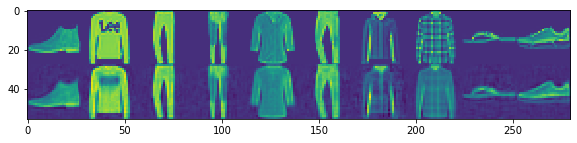

Epoch 1/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0109
Epoch 2/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0054
Epoch 3/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0046
Epoch 4/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.0042
Epoch 5/10
60000/60000 [==============================] - 17s 292us/step - loss: 0.0040
Epoch 6/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0038
Epoch 7/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0037
Epoch 8/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0035
Epoch 9/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0034
Epoch 10/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0034
when P = 200 PSNR = 25.81257631994362


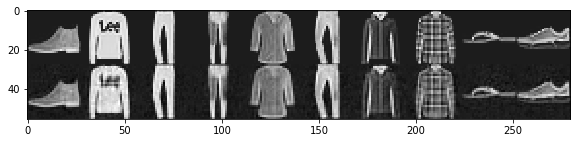

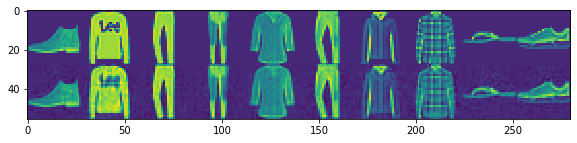

In [64]:
for P in [10, 50, 200]:
    decompressed_test_images = define_model(P)
    average_PSNR = get_average_PSNR(test_images, decompressed_test_images)
    print('when P =', P, 'PSNR =', average_PSNR)
    display_gray_images(test_images, decompressed_test_images, P)
    display_color_images(test_images, decompressed_test_images, P)
    